<a href="https://colab.research.google.com/github/simranwork/Model_training/blob/master/Model_training%20/SpAM/SpAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#Workflow
#1. Data Cleaning
#2. EDA
#3. Text preprocessing
#4. Model Builiding
#5. Evaluation
#6. Improvement
#7. website
#8. Deployment using Heroku

# 1. Data cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#dropping last 3 cols as there are a large number of null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df.sample(5)

,v1,v2
4961,ham,Yup ok...
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...
5317,ham,"K, fyi I'm back in my parents' place in south ..."
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
4042,ham,I am literally in bed and have been up for lik...


In [ ]:
#renaming cols
df.rename(columns={'v1':'target','v2':'message'},inplace = True)
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
#df['target']=df['target'].map({'ham':0,'spam':1})
#df.head()

In [ ]:
#or use label encoding from sklearn for this
#M2
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check for missing values
df.isnull().sum()

target     0
message    0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#drop duplicates
df = df.drop_duplicates(keep ='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# 2. EDA

In [ ]:
# count number of hams and spams
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

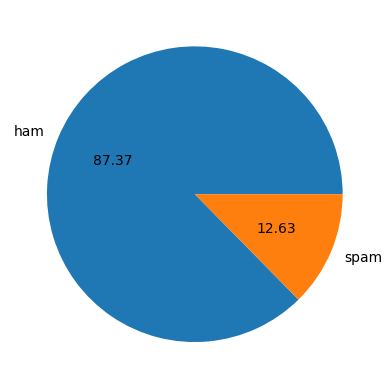

In [ ]:
#to visualize it
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# --> data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#in msg col count length of each msg
df['num_char']= df['message'].apply(len)

In [ ]:
df.head()

,target,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#count number of words
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sent']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

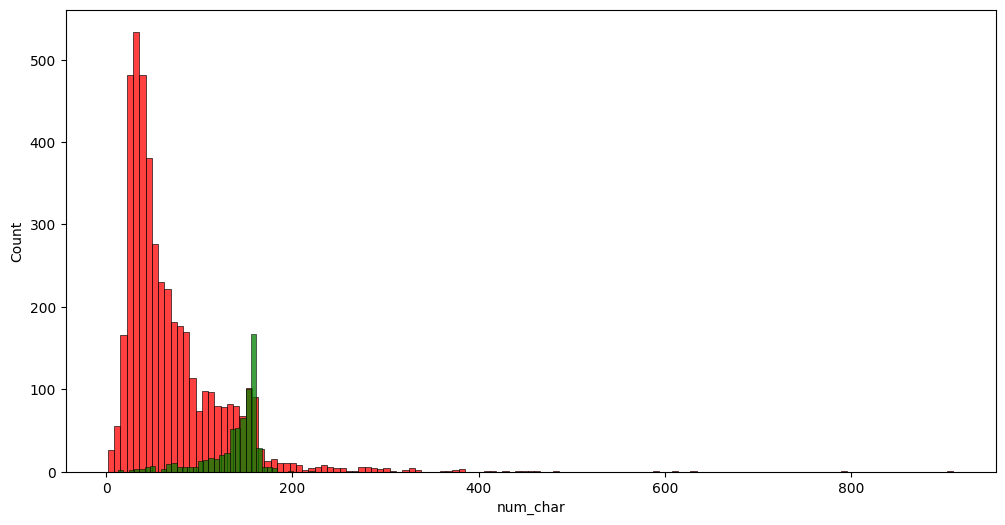

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'],color='r')
sns.histplot(df[df['target']==1]['num_char'],color='g')

<Axes: xlabel='num_words', ylabel='Count'>

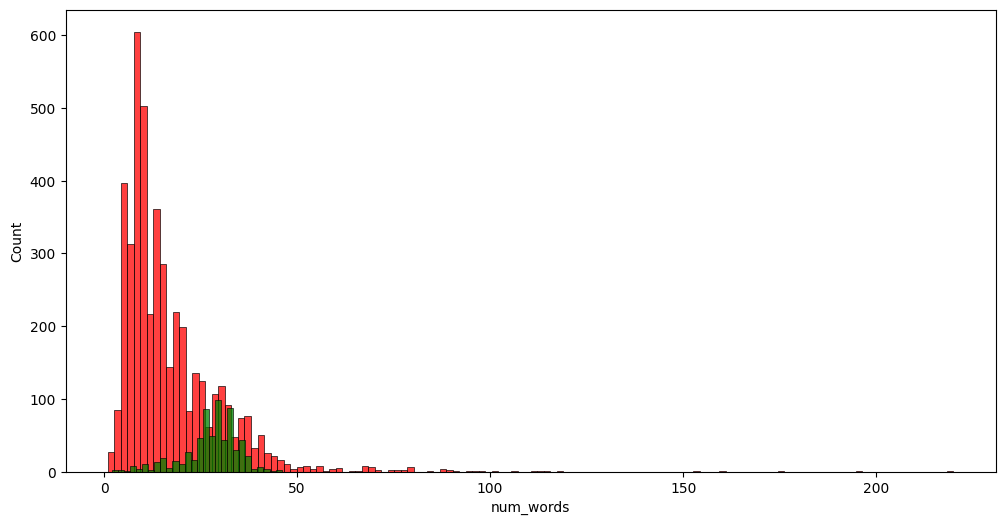

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='r')
sns.histplot(df[df['target']==1]['num_words'],color='g')

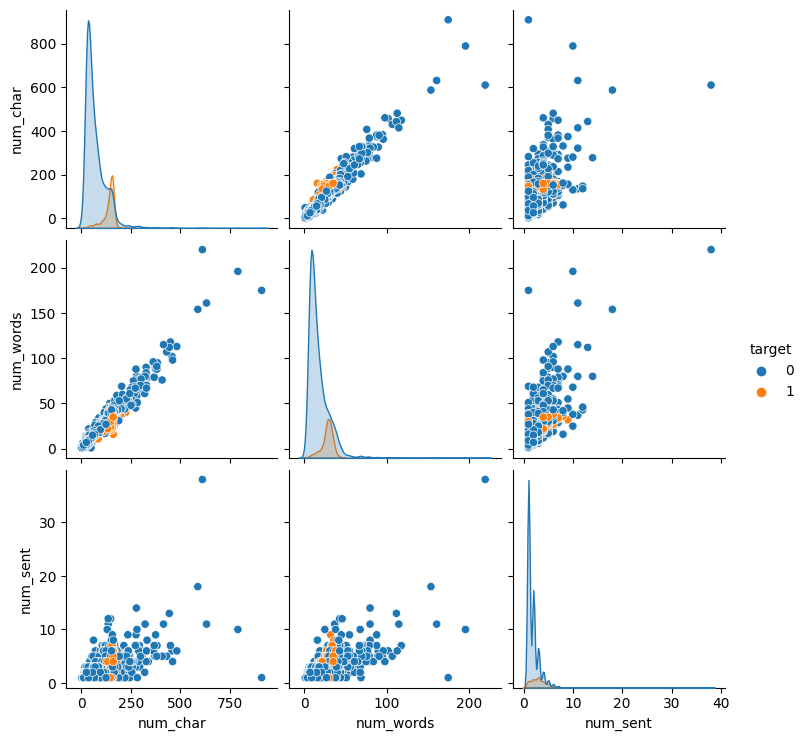

In [ ]:
sns.pairplot(df,hue= 'target')

<ipython-input-36-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

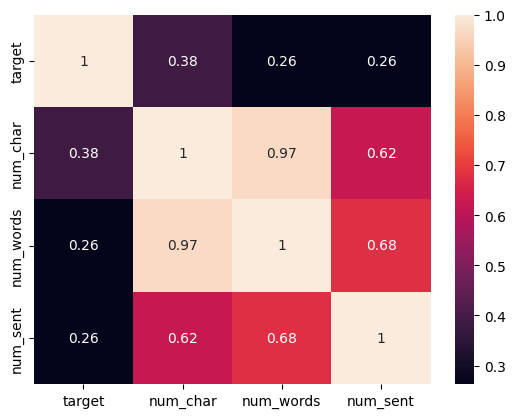

In [ ]:
sns.heatmap(df.corr(),annot = True)

# Data/Text preprocessing


In [ ]:
def text_transform(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]   #important
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))



  return ' '.join(y)


In [ ]:
text_transform('I loved the show of loving people in playing grounds!!')

'love show love peopl play ground'

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')



'love'

In [ ]:
df['transformed_text']= df['message'].apply(text_transform)
df.head()

,target,message,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width = 500,height= 500,min_font_size= 10,background_color='black')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

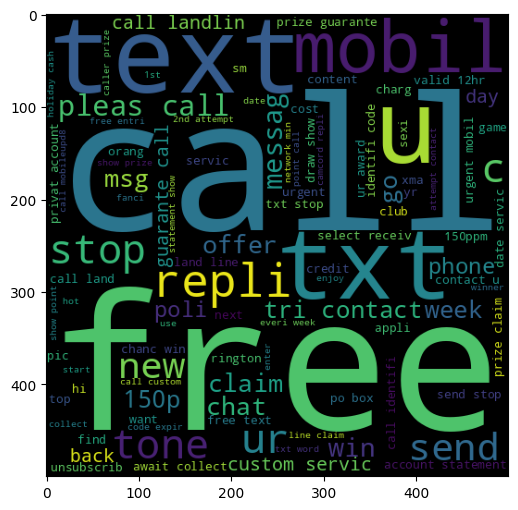

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

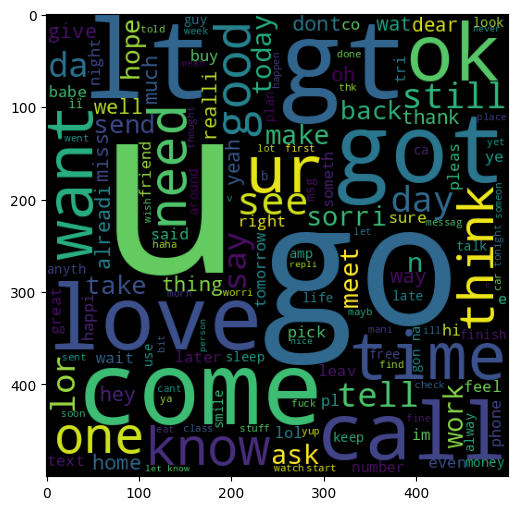

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
spam_words =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_words.append(word)
print(len(spam_words))


9939


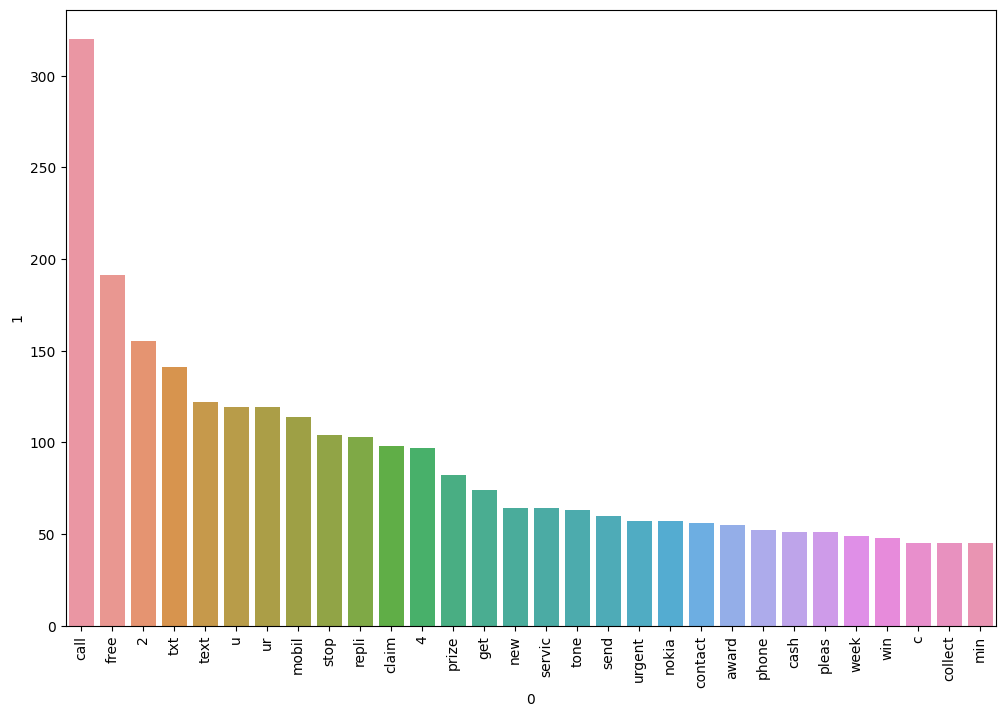

In [ ]:
from collections import Counter
plt.figure(figsize=(12,8))
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,message,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
ham_words =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_words.append(word)
print(len(ham_words))

35404


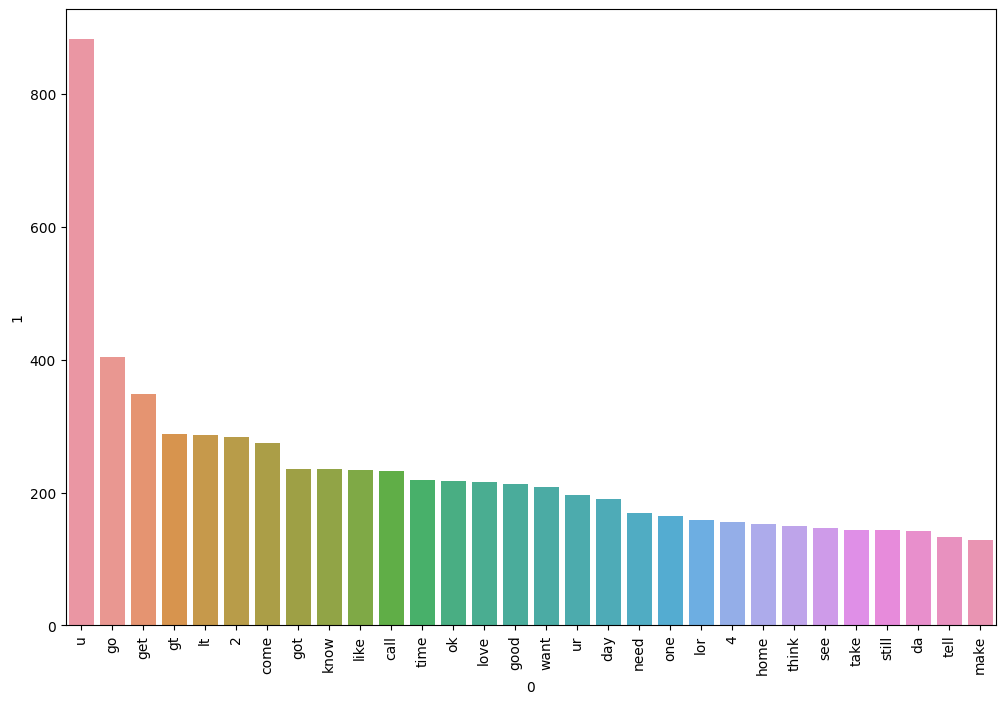

In [ ]:
from collections import Counter
plt.figure(figsize=(12,8))
sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(30))[0],y=pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# model building


In [ ]:
# naive bayes algo


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tvidf = TfidfVectorizer(max_features=3000)

In [ ]:
x =cv.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 6708)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb =GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [ ]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
gnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
a =tvidf.fit_transform(df['transformed_text']).toarray()
a.shape

(5169, 3000)

In [ ]:
a_train,a_test,y_train,y_test = train_test_split(a,y,test_size=0.2,random_state=2)

In [ ]:
mnb.fit(a_train,y_train)
y_pred1 = mnb.predict(a_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(a_train,y_train)
y_pred3 = bnb.predict(a_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
gnb.fit(a_train,y_train)
y_pred2 = gnb.predict(a_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9264990328820116, 0.7421875)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.925531914893617
Precision -  0.9420289855072463
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [ ]:
performance_precision_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_precision_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.925532,0.942029
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [ ]:
performance_accuracy_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)


In [ ]:
performance_accuracy_df

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.991379
10,xgb,0.973888,0.966387
5,RF,0.971954,1.000000
4,LR,0.970986,0.973684
2,NB,0.964217,0.834437
6,AdaBoost,0.963250,0.946429
7,BgC,0.962282,0.915966
9,GBDT,0.943907,0.944444
0,SVC,0.926499,0.742188
3,DT,0.925532,0.942029


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, a_train,y_train,a_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [ ]:
performance_precision_1df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_precision_1df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
import pickle
pickle.dump(tvidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))